In [0]:
from typing import Dict, Tuple, Text

import requests
import json

import datetime
import matplotlib.pyplot as plt

import numpy as np

In [0]:
def get_accepted_problems_dict(submissions: Dict) -> Dict[Tuple[Text, Text], int]:
  ac_problems_ratings = {}
  ac_problems_submission_time = {}
  ac_tags = {}
  for submission in submissions:
    if submission['verdict'] != 'OK':
      continue
    submission_time = submission['creationTimeSeconds']
    problem = submission['problem']
    if 'rating' not in problem:
      continue
    
    contest_id = problem['contestId']
    problem_index = problem['index']
    problem_rating = problem['rating']
    
    problem_id = (contest_id, problem_index)
    if problem_id in ac_problems_ratings:
      assert ac_problems_ratings[problem_id] == problem_rating
    else:
      ac_problems_ratings[(contest_id, problem_index)] = problem_rating
      ac_problems_submission_time[(contest_id, problem_index)] = submission_time
  return ac_problems_ratings, ac_problems_submission_time

In [0]:
def get_ac_statistics(ac_problems_ratings: Dict[Tuple[Text, Text], int]):
  ratings = list(ac_problems_ratings.values())

  # Histogram of ratings
  fig = plt.figure()
  _ = plt.hist(ratings)
  _ = plt.xlabel('problem ratings')
  _ = plt.ylabel('frequency')
  _ = plt.title('Problem ratings.')

  # Mean and median problem rating
  mean_rating, median_rating = np.mean(ratings), np.median(ratings)
  print('Mean difficulty =', mean_rating)
  print('Median difficulty =', median_rating)

  # Top 20% hardest problems
  num_ac = len(ratings)
  top_20 = int(num_ac * 0.2 + 0.5)
  
  ratings.sort()
  hardest_20 = ratings[-top_20:]

  hard_mean_rating, hard_median_rating = np.mean(hardest_20), np.median(hardest_20)

  # Histogram of ratings of hardest 20
  fig = plt.figure()
  _ = plt.hist(hardest_20)
  _ = plt.xlabel('problem ratings')
  _ = plt.ylabel('frequency')
  _ = plt.title('Top 20% hardest problem rating.')

  print('Hard mean difficulty =', hard_mean_rating)
  print('Hard median difficulty =', hard_median_rating)

In [0]:
def get_ac_problem_time_series(ac_problems_ratings, ac_problems_submission_time):
  problems = ac_problems_ratings.keys()

  dates = [ac_problems_submission_time[problem] for problem in problems]
  dates = [datetime.datetime.fromtimestamp(ts) for ts in dates]

  values = [ac_problems_ratings[problem] for problem in problems]

  fig = plt.figure(figsize=(20, 10))
  plt.scatter(dates, values)  
  _ = plt.xlabel('date')
  _ = plt.ylabel('problem rating')
  _ = plt.title('Scatter plot, difficutly vs time.')

In [8]:
user = 'VastoLorde95' #@param
url = 'http://codeforces.com/api/user.status?handle=' + user + '&from=1'

response = requests.get(url=url)
response = json.loads(response.text)
submissions = response['result']

print(user, 'has made', len(submissions), 'submissions')

VastoLorde95 has made 3482 submissions


Mean difficulty = 1763.4751773049645
Median difficulty = 1700.0
Hard mean difficulty = 2500.0
Hard median difficulty = 2500.0


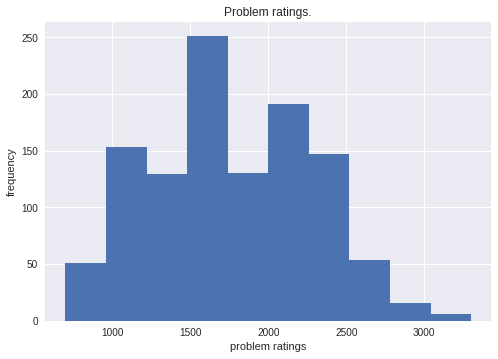

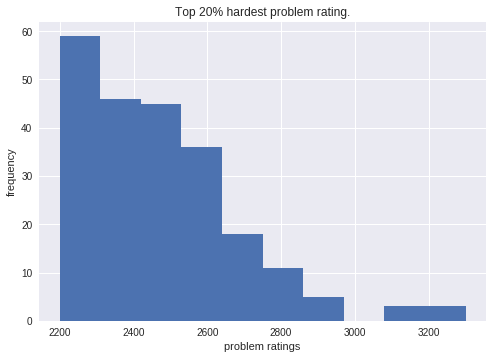

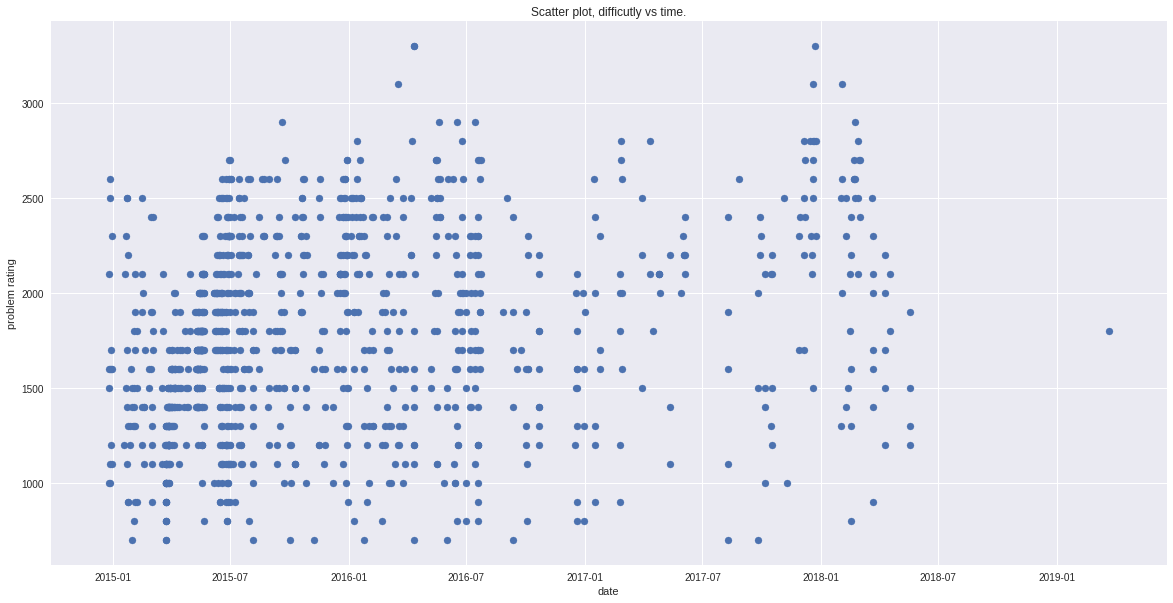

In [9]:
ac_problems_ratings, ac_problems_submission_time = get_accepted_problems_dict(submissions)
get_ac_statistics(ac_problems_ratings)
get_ac_problem_time_series(ac_problems_ratings, ac_problems_submission_time)